# <font color='red'>3</font>:30:300:3000

# A.회귀문제

In [186]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [187]:
# 데이터 읽어오기
path = 'https://bit.ly/BostonFile'
data = pd.read_csv(path)

# 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [188]:
# x, y 분리
target = 'medv'
x = data.drop(target, axis=1)
y = data[target] # == data.loc[:, target]

In [189]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=2022)

## 1.Linear Regression

In [190]:
# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 3.4962689389088837
R2-Score: 0.7430693569118809


In [191]:
# 회귀계수 확인
print(list(x)) # 컬럼이름 같이 확인
print(model.coef_) # 기울기 == 가중치
print(model.intercept_) # 절편

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
[-1.04447993e-01  3.82857718e-02  5.00367117e-02  3.06918783e+00
 -1.38572971e+01  4.40479718e+00 -7.59948972e-03 -1.34224578e+00
  3.03499788e-01 -1.19378237e-02 -9.58449847e-01  8.27768652e-03
 -5.38710209e-01]
30.936834852137324


> 회귀계수를 보기 어렵다 시각화 해서 확인해보자

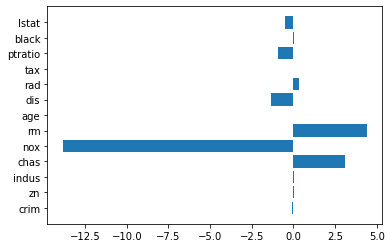

In [192]:
# 회귀계수 시각화
plt.barh(list(x), model.coef_)
plt.show()

> 그래프를 확인 해보니, nox가 영향을 제일 많이 미칠 것으로 보인다.(=가중치가 제일 크다 = medv와 음의 상관관계가 있다)  
> 두번째로 영향을 많이 미칠 것 rm  
> 세번쨰로 영향을 많이 미치는 것 chas(찰스강변)

## 2.Decision Tree

In [193]:
# 모델링
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

model = DecisionTreeRegressor(max_depth=3, random_state=2022) # max_depth=5 :디폴트 값
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 3.4714201840983776
R2-Score: 0.7225421834596881


In [194]:
# x 데이터 컬럼이름 뽑아내기
list(x)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [195]:
# 어느 변수로 부터 의사결정 나무가 결정을 해나갔을까?

# 각 변수들의 기여도 == 중요도
model.feature_importances_

array([0.02157093, 0.        , 0.        , 0.        , 0.03985882,
       0.68419403, 0.        , 0.08950513, 0.        , 0.        ,
       0.00463244, 0.        , 0.16023865])

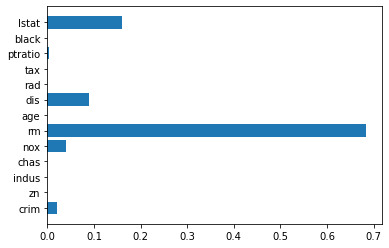

In [196]:
# 변수 중요도 시각화

# Decision Tree에서 가장 영향을 많이 준 변수 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

> rm 이 가장 영향을 많이 준 변수!!

> 영향을 많이 주는 변수별로 정렬해서 이쁘게 보고 싶다

In [197]:
# 데이터프레임 만들어 정렬
score = pd.DataFrame()
score['feature'] = list(x)
score['importance'] = model.feature_importances_
score.sort_values(by='importance', axis=0, ascending=True, inplace=True)
print(score['importance'].sum())
print(score)

1.0
    feature  importance
1        zn    0.000000
2     indus    0.000000
3      chas    0.000000
6       age    0.000000
8       rad    0.000000
9       tax    0.000000
11    black    0.000000
10  ptratio    0.004632
0      crim    0.021571
4       nox    0.039859
7       dis    0.089505
12    lstat    0.160239
5        rm    0.684194


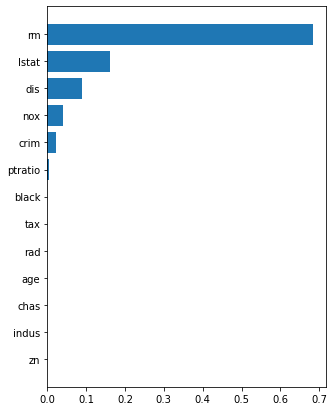

In [198]:
# 정렬 후, 변수 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(score['feature'], score['importance'])
plt.show()

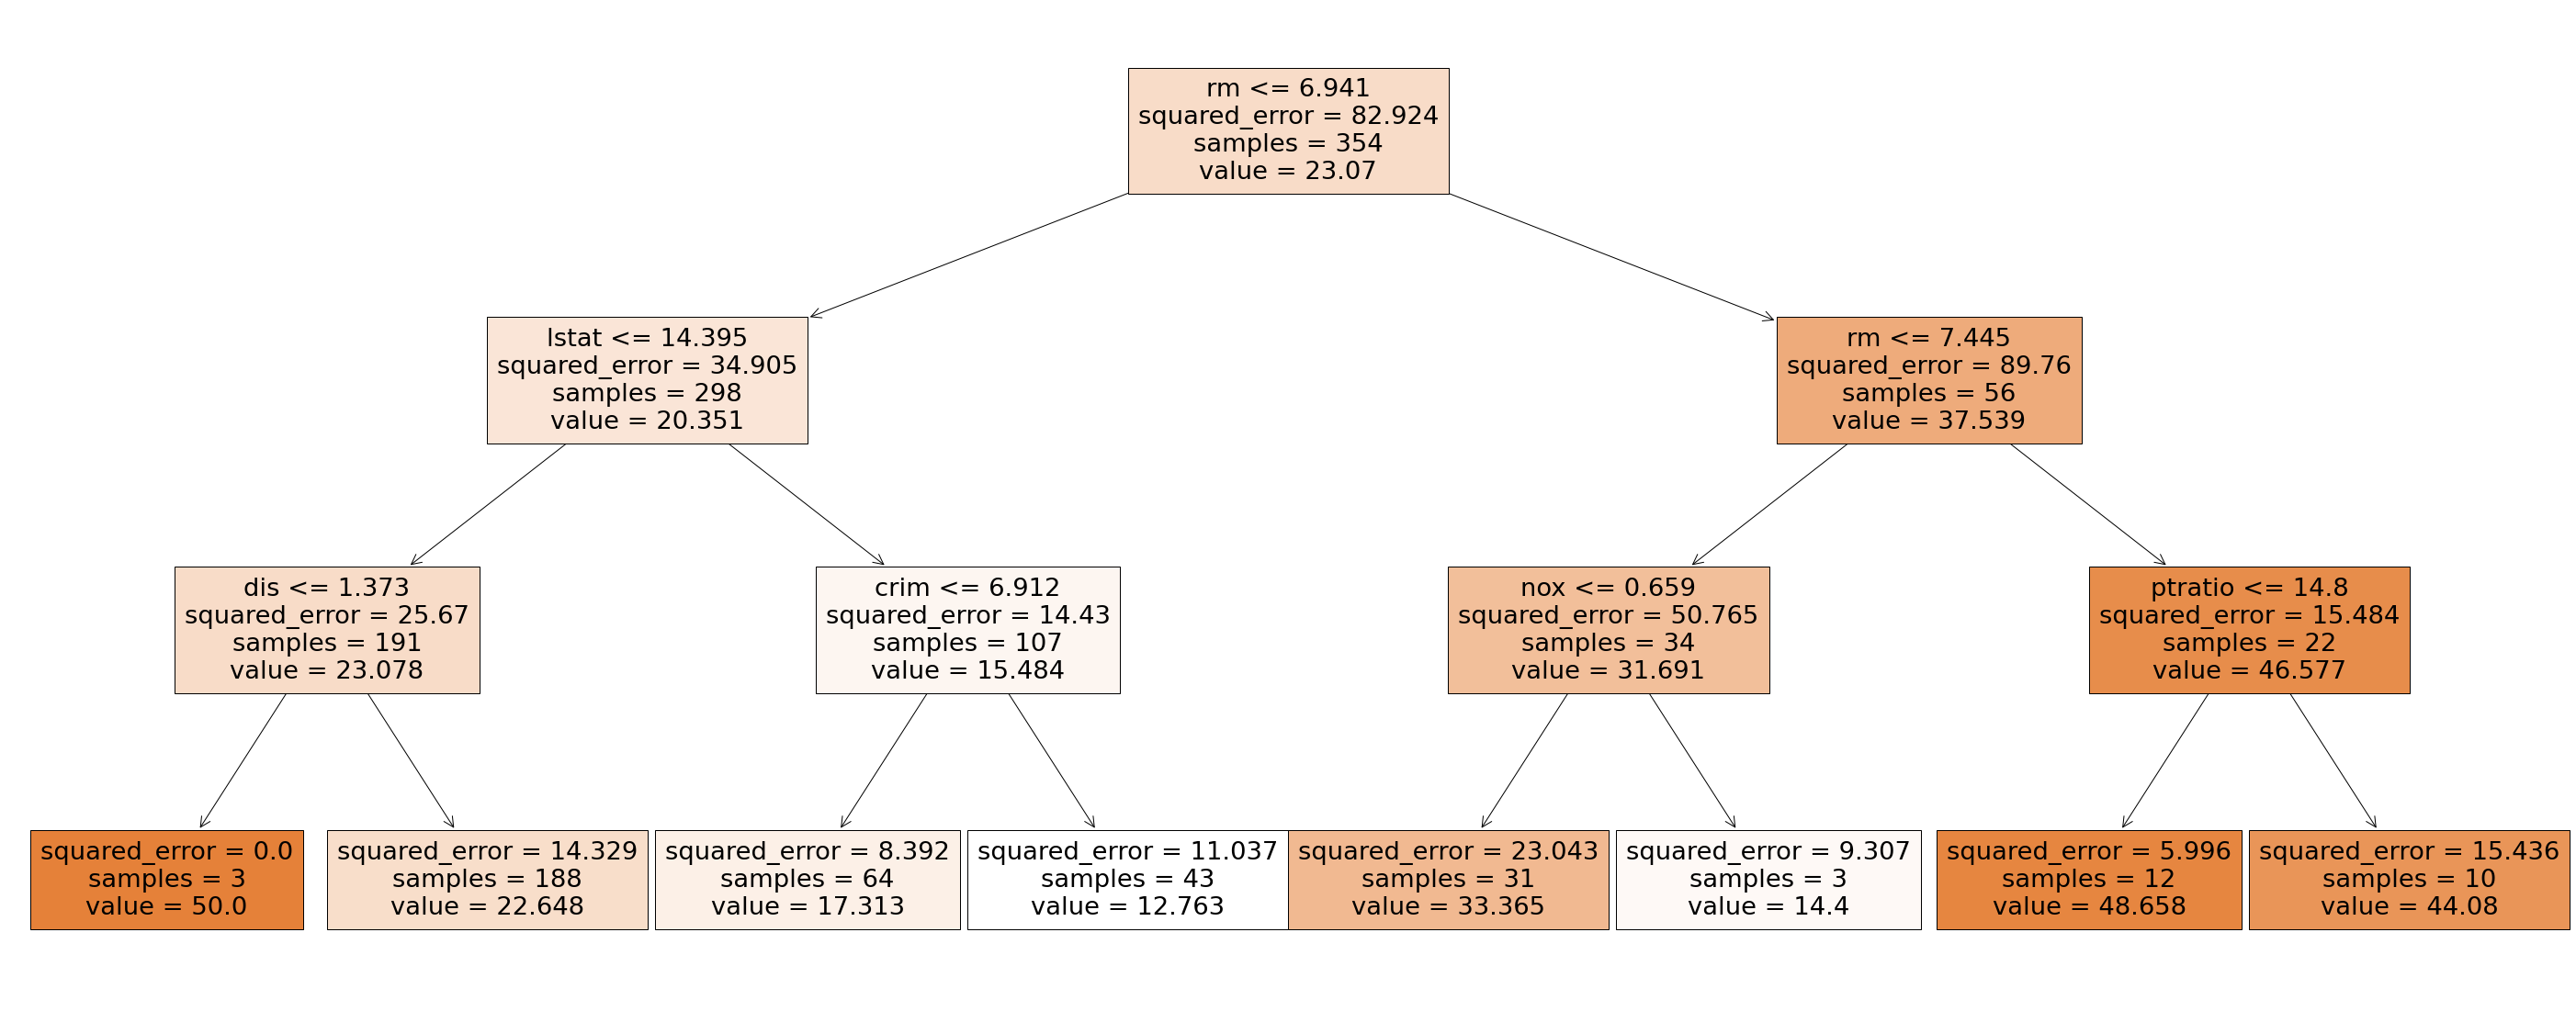

In [199]:
# Decision Tree 시각화
plt.figure(figsize=(50, 20))
plot_tree(model, 
          filled=True,  # filled=True : 색깔 주기
          feature_names=list(x)) # feature_names=list(x)를 써야 변수 이름이 보인다
plt.show()

## 3.KNN

In [200]:
# 정규화
## 정규화 대상이 되는 데이터 영역: x_train, x_test (= x 만 정규화 한다!!!) ##

x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [201]:
# 모델링
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, r2_score

model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 2.957105263157895
R2-Score: 0.7997044514018815


# B.분류문제

In [202]:
# 데이터 읽어오기
path = 'https://bit.ly/AdmissionFile'
data = pd.read_csv(path)

# 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [203]:
# x, y 분리
target = 'ADMIT'
x = data.drop(target, axis=1)
y = data[target] # == data.loc[:, target]

In [204]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=2022)

## Deicision Tree

In [205]:
# 모델링
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier(max_depth=5, random_state=2022) # max_depth=5 :디폴트 값
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74  9]
 [12 55]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        83
           1       0.86      0.82      0.84        67

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



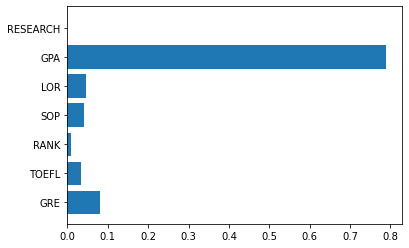

In [206]:
# Deicision Tree 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

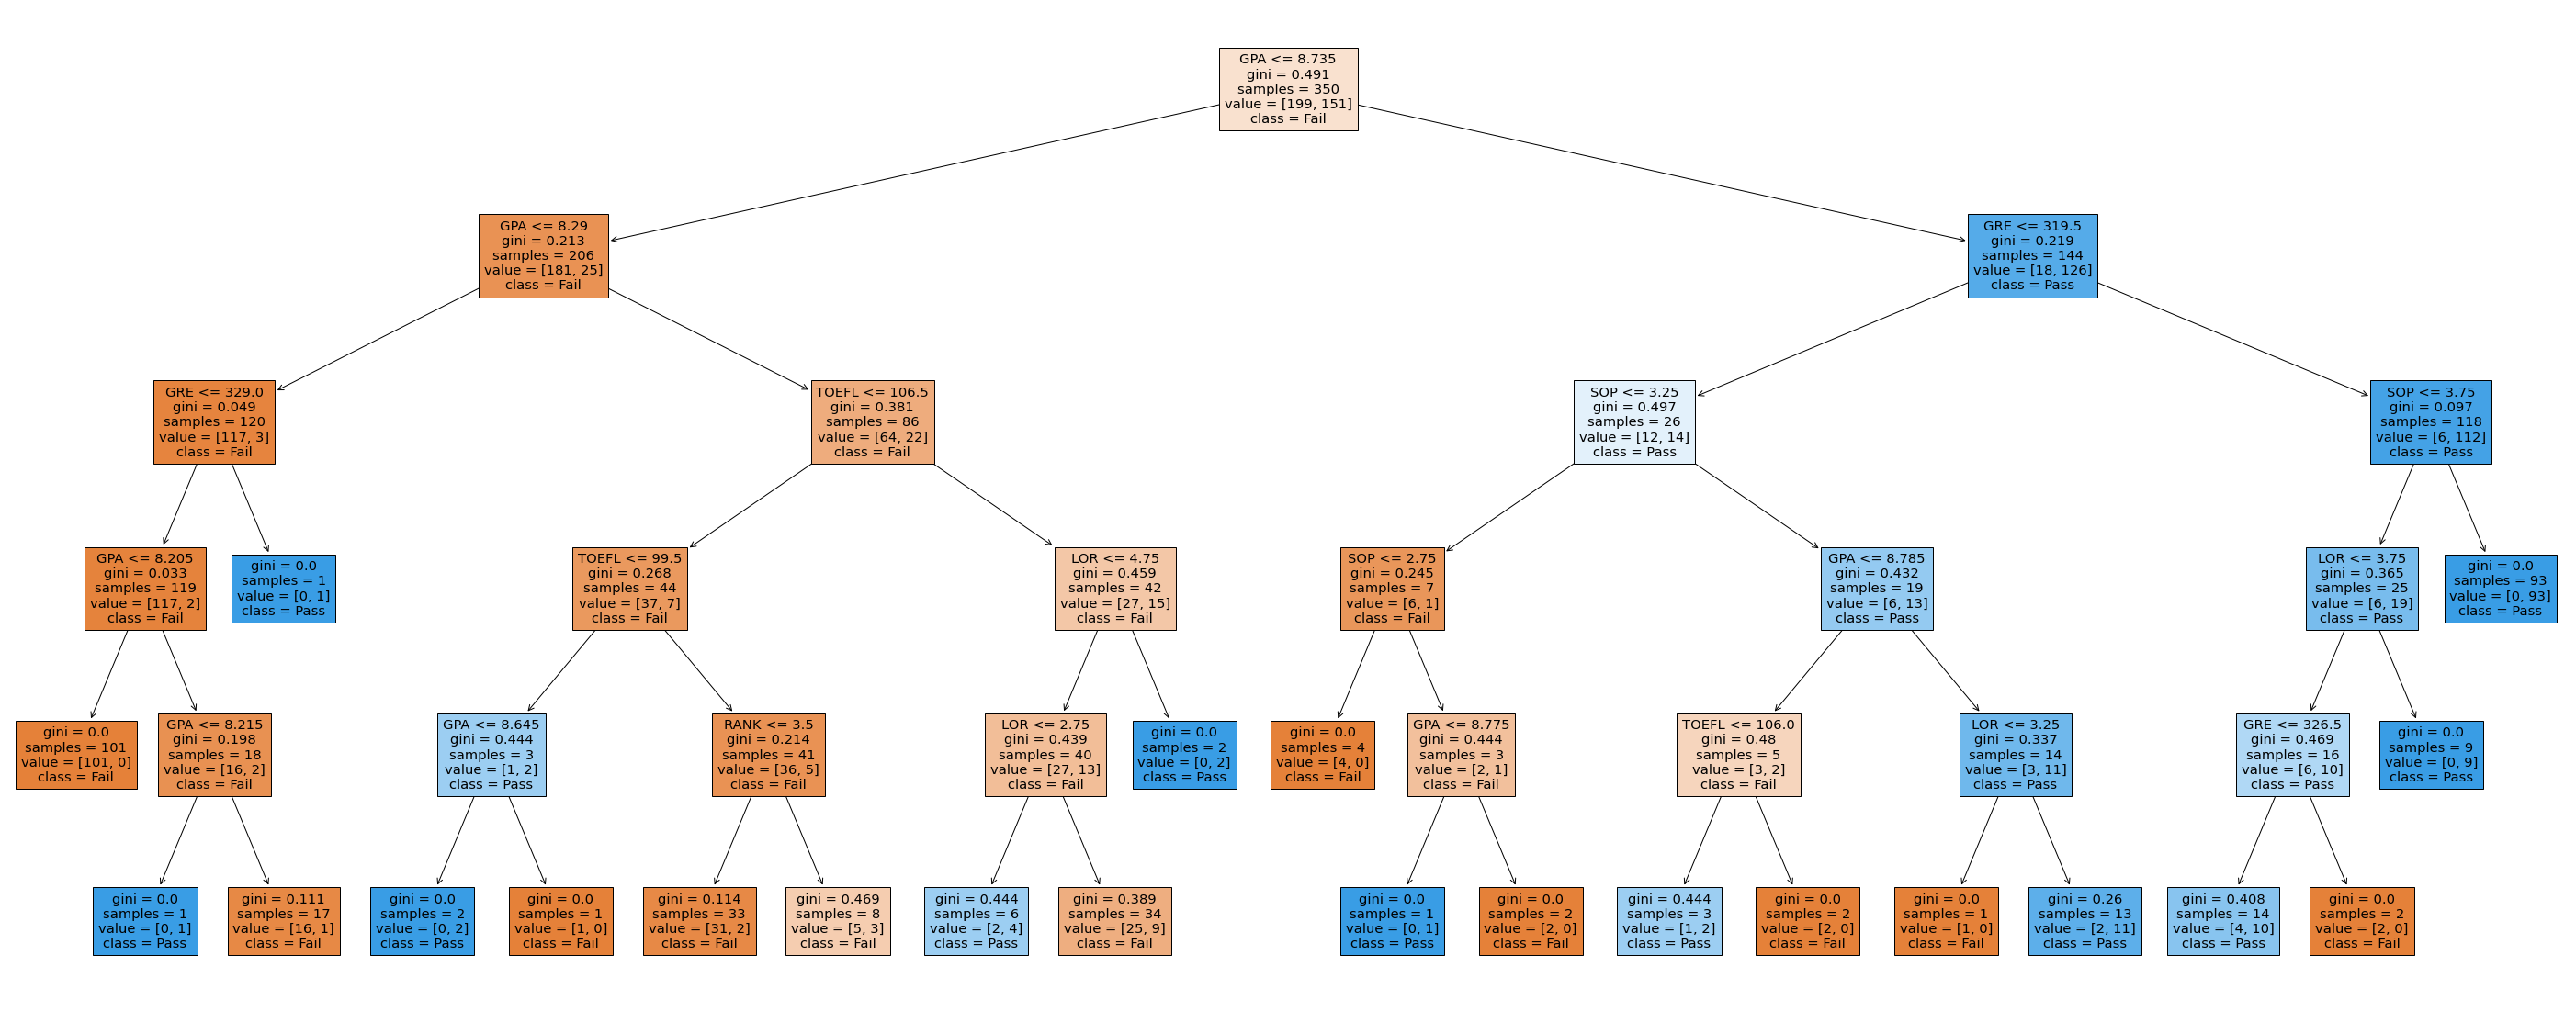

In [207]:
plt.figure(figsize=(50, 20))
plot_tree(model,
         filled=True,
         feature_names=list(x),
         class_names=['Fail', 'Pass'])
plt.show()